In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Decison Trees

First we'll load some fake data on past hires. Let's suppose this data is related to the probability a candidate will get hired based on some attributes.

We will use pandas to convert a csv file into a DataFrame:

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [ ]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In order for the decision tree to work, scikit-learn needs everything to be numerical. So, we'll map Y and N to 1 and 0, and levels of education to some scale of 0-2. 

Also, in the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we'll get NaN for unexpected values.

In [ ]:
# we create a dictionary to map the values Y and N, and we apply it on Employed?, Top-tier school, Interned and Hired columns
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,BS,0,0,1
1,0,0,0,BS,1,1,1
2,7,0,6,BS,0,0,0
3,2,1,1,MS,1,0,1
4,20,0,2,PhD,1,0,0
5,0,0,0,PhD,1,1,1
6,5,1,2,MS,0,1,1
7,3,0,1,BS,0,1,1
8,15,1,5,BS,0,0,1
9,0,0,0,BS,0,0,0


In [ ]:
# next we create a dictionary to map education levels
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Next we need to separate the features from the target column that we're trying to bulid a decision tree for. 
The features are the attributes that we're trying to predict from.
The target column, what we are tryng to predict, is 'Hired' column.

In [ ]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Now actually construct the decision tree. First we construct lists to hold the features and the targets.

In [ ]:
# y is the target
y = df["Hired"]
# X are the features being modelled
X = df[features]

# two lines of code to actually create the decision tree classifier
clf = tree.DecisionTreeClassifier()
# here we fit it on the feature data and the answers
clf = clf.fit(X,y)

... and display it, using pydotplus library.


In [ ]:
#!pip install pydotplus

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

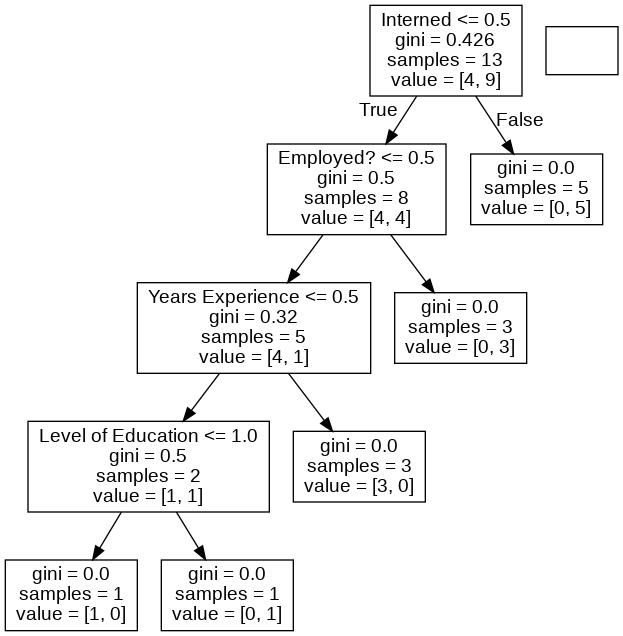

In [ ]:
from IPython.display import Image  
from six import StringIO
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

At each stage we have a decision. If Interned <= 0.5 (Interned can be 0 or 1) we go left, if not, we go right. And the way this data was made is that each intern got a job, so if Interned <= 0.5 is False, we go right, meaning that at inference if a candidate interned at the company, he is worth bringing in.

The gini score is a measure of entropy. As we're going down the tree, the algorithm tries to minimize the ammount of entropy.

The samples are the remaining no of sample that haven't been sectioned off by a previous decision.

When we read the final leaf node, we read the *value* variable.
value = [0, 5] -> we had 0 candidates that were no-hires, and 5 that were hires.

The entropy is zero in the leaf because all 5 candidates are the same, hireable.

So the algorithm keeops going until we reach an entropy of zero, if possible, for every case.

## Ensemble learning: using a random forest

Let's say we're worried about overfitting on our training data, so we'll use a random forest of 10 decision trees to predict employment of specific candidate profiles.

We can use the same data we used before, X, the training data, and y, the labels.

We'll use RandomForestClassifier from sklearn, and all we'll do is give the number of trees I want in my random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

Next, let's predict if a candidate will get hired or not. 
Remember the feature columns: ['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned'].

We will try to predict what's going to happen for a candidate with 10 years of experience, employed, 4 previous emplyeers, bachelor level of education, but not at a top-tier school, and not interned.

In [ ]:
#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))


[1]


And for a candidate with almost the same attributes, except the fact that he is unenployed:

In [ ]:
#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]


## Activity

Task: Add 17 more lines to PastHires.csv, and a column called "Python" that can have either Y or N values. Train your model and make 5 predictions.


Source: https://github.com/PacktPublishing/Hands-On-Data-Science-and-Python-Machine-Learning/blob/master/DecisionTree.ipynb

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [ ]:
corpus = ['The apple is on sale', 'The oranges are on sale', 'The apple is on the table and is present', 'The orange is here and is present']

In [ ]:
Y = np.array([1,2,1,2])  # my labels (the targets)
print(Y)

[1 2 1 2]


In [ ]:
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus).toarray()
print(X)

[[0 1 0 0 1 1 0 0 0 1 0 1]
 [0 0 1 0 0 1 0 1 0 1 0 1]
 [1 1 0 0 2 1 0 0 1 0 1 2]
 [1 0 0 1 2 0 1 0 1 0 0 1]]


In [ ]:
vectorizer.get_feature_names_out()

array(['and', 'apple', 'are', 'here', 'is', 'on', 'orange', 'oranges',
       'present', 'sale', 'table', 'the'], dtype=object)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X, Y)
clf.predict(vectorizer.transform(['pear is present']).toarray())

array([2])